In [5]:
cd /home/kvothe/repo/dbt-metadata-utils/

/home/kvothe/repo/dbt-metadata-utils


In [6]:

%reload_ext autoreload
%autoreload 2

import json
from collections import deque
from typing import List, Dict, Tuple
from pprint import pprint
from moz_sql_parser import parse
import networkx as nx
from dbt_metadata_utils.column_level import LineagePoint, find_col, slice_ctes, process_lineage_point, draw_graph, draw_multi_graph

In [7]:
model_name = "idf_entities"
with open('notebooks/query.sql', 'r') as f:
    raw_query = f.read()
query = parse(raw_query)

In [8]:
def get_path(col_of_interest, path_id=0):
    nodes: Dict[str, bool] = {}  # dict with bool value which is equal to whether we display the node or not
    edges: List[Tuple[str, str]] = []
        
    # initialise the deque https://docs.python.org/3/library/collections.html#collections.deque
    root = LineagePoint(*find_col(query, col_of_interest), model_name)
    nodes[str(root)] = True
    to_be_parsed = deque([root])

    while len(to_be_parsed):
        lp = to_be_parsed.popleft()
    #     print((str(lp), lp.x, lp.y, lp.display_name))
        
        new_lps: List[LineagePoint] = process_lineage_point(lp, query)
        if new_lps is None or isinstance(lp, list) or isinstance(lp, dict):
            nodes[str(lp)] = False
        else:
            to_be_parsed.extend(new_lps)
            for new_lp in new_lps:
                edges.append((str(new_lp), str(lp)))
                nodes[str(new_lp)] = True
    return [(n1, n2) for n1, n2 in edges if nodes.get(n1) and nodes.get(n2)]    

AQUIII!


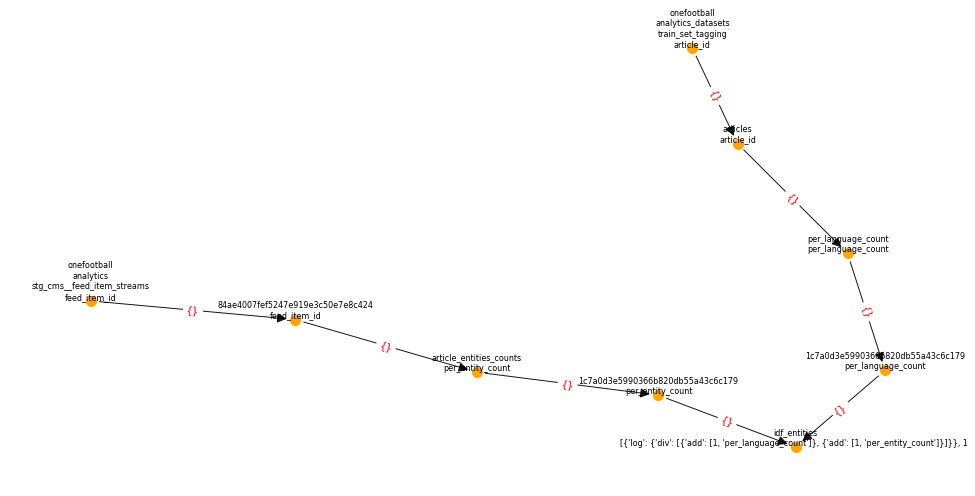

In [9]:
G = nx.DiGraph()
e = get_path('idf')
G.add_edges_from(e)
fig = draw_graph(G)